# Simple Neural Network using PyTorch #

Author: ****Pier Luca Anania****

In [41]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In this example we're going to use **Iris Dataset**

In [42]:
import torch
import torch.nn as nn                   #Neural Network
import torch.nn.functional as F         #to move data forward in our function

Create a model class that inherits _nn.Module_

In [43]:
class Model(nn.Module):
    
    '''Structure:
    - Input Layer (4 features of the flower: sepal lenght/width, petal lenght/width)
    - Hidden Layer 1 := H1 (# of neurons)
    - H2 (# of neurons)
    - Output Layer (3 classes of Iris flowers: Iris Setosa/Versicolour/Virginica)
    '''
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        
        super().__init__()                                 #instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)              #fc := fully connected
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):       #function to move everything forward
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x


Pick a manual seed for randomization

In [44]:
torch.manual_seed(41)

Create an instance of our Model

In [45]:
model = Model()

## Working with Data

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [47]:
#Visualize different elements of variety

my_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [48]:
#Encoding variety column: str --> int

my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

my_df['variety'].unique()

array([0., 1., 2.])

Train Test Split ---> set X,y

In [49]:
X = my_df.drop('variety', axis=1)    #Select features w/o variety
y = my_df['variety']

Convert the dataframe into numpy arrays

In [50]:
X = X.values
y = y.values

Start work on NN

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,        
                                                    random_state=41)     # % of test data

Convert X features to Tensor with float numbers

In [52]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

Convert y labels to Tensor Long

In [53]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Set the criterion to measure the error, how far off the predictions are from the data

In [54]:
criterion = nn.CrossEntropyLoss()

Choose ADAM optimizer: lr := learning rate

In [55]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.parameters #just to show

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

Train model:

number of Epochs -- Epoch is one run thru all the training data in our network

In [56]:
epochs = 200
losses = []

for i in range(epochs):
    
    #Go forward and get prediction
    y_pred = model.forward(X_train)
    
    #Measure the loss: predicted values - trained values
    loss = criterion(y_pred, y_train)
    
    #Keep track of our losses
    losses.append(loss.detach().numpy())
    
    #Print every 10 Epochs
    if i%10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    
    #Backpropagation -> fine tuning of the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.125203251838684
Epoch: 10 Loss: 1.0097211599349976
Epoch: 20 Loss: 0.8162347674369812
Epoch: 30 Loss: 0.5859931111335754
Epoch: 40 Loss: 0.40033894777297974
Epoch: 50 Loss: 0.26794713735580444
Epoch: 60 Loss: 0.1796349436044693
Epoch: 70 Loss: 0.12165624648332596
Epoch: 80 Loss: 0.0860651507973671
Epoch: 90 Loss: 0.06522615998983383
Epoch: 100 Loss: 0.05286872759461403
Epoch: 110 Loss: 0.04508011043071747
Epoch: 120 Loss: 0.03979313746094704
Epoch: 130 Loss: 0.03596426174044609
Epoch: 140 Loss: 0.033027999103069305
Epoch: 150 Loss: 0.030512522906064987
Epoch: 160 Loss: 0.027733536437153816
Epoch: 170 Loss: 0.02461211010813713
Epoch: 180 Loss: 0.021672355011105537
Epoch: 190 Loss: 0.019320257008075714


Graph

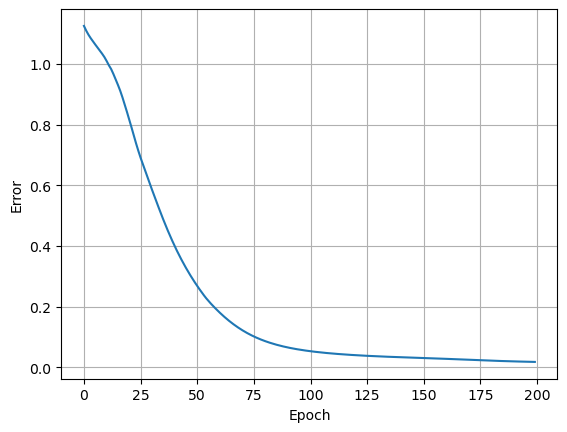

In [57]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()

Evaluate the model on the test set - validate model

In [58]:
with torch.no_grad():        #basically turn off backpropagation: test doesn't need BP
    
    y_eval = model.forward(X_test)      #X_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, y_test)      #find loss/error
    

In [64]:
correct = 0

with torch.no_grad():
    
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        
        if y_test[i] == 0:
            name = 'Setosa'
        elif y_test[i] == 1:
            name = 'Versicolor'
        else:
            name = 'Virginica'
        
        #Results
        print(f'{i+1}.)  {str(y_val)} \t Test: {y_test[i]} Name: {name} \t Val: {y_val.argmax().item()}')
        
        #Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
print(f'\n# of correct data: {correct}')
            

1.)  tensor([-7.0835,  3.9383,  8.7365]) 	 Test: 2 Name: Virginica 	 Val: 2
2.)  tensor([-9.8711,  1.7715, 15.9529]) 	 Test: 2 Name: Virginica 	 Val: 2
3.)  tensor([-10.8322,   3.0171,  16.0896]) 	 Test: 2 Name: Virginica 	 Val: 2
4.)  tensor([-3.9555,  7.8952, -1.1898]) 	 Test: 1 Name: Versicolor 	 Val: 1
5.)  tensor([-8.9618,  3.6069, 12.2658]) 	 Test: 2 Name: Virginica 	 Val: 2
6.)  tensor([-2.1212,  8.5257, -5.1761]) 	 Test: 1 Name: Versicolor 	 Val: 1
7.)  tensor([-6.8941,  4.9858,  7.1657]) 	 Test: 2 Name: Virginica 	 Val: 2
8.)  tensor([-3.8531,  8.0700, -1.5697]) 	 Test: 1 Name: Versicolor 	 Val: 1
9.)  tensor([-7.9051,  4.2999,  9.6753]) 	 Test: 2 Name: Virginica 	 Val: 2
10.)  tensor([-10.5531,   1.8381,  17.0211]) 	 Test: 2 Name: Virginica 	 Val: 2
11.)  tensor([-6.5108,  5.1472,  6.3424]) 	 Test: 2 Name: Virginica 	 Val: 2
12.)  tensor([ 11.4622,   1.4094, -20.3323]) 	 Test: 0 Name: Setosa 	 Val: 0
13.)  tensor([ 10.5284,   1.2514, -18.4662]) 	 Test: 0 Name: Setosa 	 Val: 0

Here column 1 refers to 0.0, 2 to 1.0 and 3 to 2.0. The highest number is the type of flower